# Google Colab Lab Assignment -NLP

**Course Name:** Deep Learning

**Lab Title:** NLP Techniques for Text Classification

**Student Name:** Pranav Khatavkar

**Student ID:** 202201090028

**Date of Submission:** 01/04/2025

**Group Members**: Omkar Karlekar, Aditya Sawleshwarkar


**Objective**
The objective of this assignment is to implement NLP preprocessing techniques and build a text classification model using machine learning techniques.




**Learning Outcomes:**

1. Understand and apply NLP preprocessing techniques such as tokenization, stopword removal, stemming, and lemmatization.

2. Implement text vectorization techniques such as TF-IDF and CountVectorizer.

3. Develop a text classification model using a machine learning algorithm.

4. Evaluate the performance of the model using suitable metrics.

# **Assignment Instructions:**

**Part 1: NLP Preprocessing**

**Dataset Selection:** https://www.kaggle.com/datasets/thedevastator/uncovering-financial-insights-with-the-reuters-2

**Drive Link for Dataset**: https://drive.google.com/drive/folders/1uLf9u9_M4nuFGGa-YTC6EmaXDSKfrFF4?usp=sharing

Choose any text dataset from **Best Datasets for Text** https://en.innovatiana.com/post/best-datasets-for-text-classification Classification, such as SMS Spam Collection, IMDb Reviews, or any other relevant dataset.

Download the dataset and upload it to Google Colab.

Load the dataset into a Pandas DataFrame and explore its structure (e.g., check missing values, data types, and label distribution).

Text Preprocessing:

Convert text to lowercase.

Perform tokenization using NLTK or spaCy.

Remove stopwords using NLTK or spaCy.

Apply stemming using PorterStemmer or SnowballStemmer.

Apply lemmatization using WordNetLemmatizer.

Vectorization Techniques:

Convert text data into numerical format using TF-IDF and CountVectorizer.



In [2]:
import pandas as pd

# Load the dataset
train_df = pd.read_csv("/content/ModApte_train.csv")
test_df = pd.read_csv("/content/ModApte_test.csv")

# Display information
print("Train Data Info:")
print(train_df.info())

print("\nTest Data Info:")
print(test_df.info())

# Check for missing values
print("\nMissing Values in Train Set:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Set:")
print(test_df.isnull().sum())

# Check label distribution
print("\nLabel Distribution in Train Set:")
print(train_df['topics'].value_counts())

print("\nLabel Distribution in Test Set:")
print(test_df['topics'].value_counts())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9603 entries, 0 to 9602
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         8816 non-null   object
 1   text_type    9603 non-null   object
 2   topics       9603 non-null   object
 3   lewis_split  9603 non-null   object
 4   cgis_split   9603 non-null   object
 5   old_id       9603 non-null   object
 6   new_id       9603 non-null   object
 7   places       9603 non-null   object
 8   people       9603 non-null   object
 9   orgs         9603 non-null   object
 10  exchanges    9603 non-null   object
 11  date         9603 non-null   object
 12  title        9549 non-null   object
dtypes: object(13)
memory usage: 975.4+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3299 entries, 0 to 3298
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   te

In [3]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Initialize tools
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Check if the text is a string and not NaN
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Tokenization using spaCy
        doc = nlp(text)
        tokens = [token.text for token in doc if token.is_alpha]  # Remove non-alphabetic tokens

        # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]

        # Stemming using PorterStemmer
        stemmed_tokens = [stemmer.stem(word) for word in tokens]

        # Lemmatization using WordNetLemmatizer
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]

        # Return the processed text
        return " ".join(lemmatized_tokens)
    else:
        # If the value is not a string (e.g., NaN), return an empty string
        return ""

# Apply preprocessing to both train and test sets
train_df["cleaned_text"] = train_df["title"].apply(preprocess_text)
test_df["cleaned_text"] = test_df["title"].apply(preprocess_text)

# Check processed text
print("\nExample Processed Text (Train Set):")
print(train_df["cleaned_text"].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



Example Processed Text (Train Set):
0                       bahia cocoa review
1    nation averag price farmer own reserv
2             argentin grain oilse registr
3                   usx debt dowgrad moodi
4      champion product approv stock split
Name: cleaned_text, dtype: object


In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# CountVectorizer: Converts a collection of text documents into a matrix of token counts
count_vectorizer = CountVectorizer(max_features=100)  # Limiting to 100 features for demonstration
X_train_count = count_vectorizer.fit_transform(train_df["cleaned_text"])
X_test_count = count_vectorizer.transform(test_df["cleaned_text"])

# Convert to DataFrame to view top words
count_df = pd.DataFrame(X_train_count.toarray(), columns=count_vectorizer.get_feature_names_out())
print("\nTop words in CountVectorizer (Train Set):")
print(count_df.head())

# TF-IDF Vectorizer: Converts text data into numerical values based on term frequency and inverse document frequency
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Limiting to 100 features for demonstration
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df["cleaned_text"])
X_test_tfidf = tfidf_vectorizer.transform(test_df["cleaned_text"])

# Convert to DataFrame to view top words
tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTop words in TF-IDF (Train Set):")
print(tfidf_df.head())



Top words in CountVectorizer (Train Set):
   acquir  acquisit  american  bank  bid  bill  billion  bond  brazil  buy  \
0       0         0         0     0    0     0        0     0       0    0   
1       0         0         0     0    0     0        0     0       0    0   
2       0         0         0     0    0     0        0     0       0    0   
3       0         0         0     0    0     0        0     0       0    0   
4       0         0         0     0    0     0        0     0       0    0   

   ...  tender  trade  treasuri  two  unit  usda  week  wheat  year  yen  
0  ...       0      0         0    0     0     0     0      0     0    0  
1  ...       0      0         0    0     0     0     0      0     0    0  
2  ...       0      0         0    0     0     0     0      0     0    0  
3  ...       0      0         0    0     0     0     0      0     0    0  
4  ...       0      0         0    0     0     0     0      0     0    0  

[5 rows x 100 columns]

Top words in 

**Splitting the Data:**

Divide the dataset into training and testing sets (e.g., 80% training, 20% testing).

**Building the Classification Model:**

Train a text classification model using Logistic Regression, Naïve Bayes, or any other suitable algorithm.

Implement the model using scikit-learn.

**Model Evaluation:**

Evaluate the model using accuracy, precision, recall, and F1-score.

Use a confusion matrix to visualize the results.

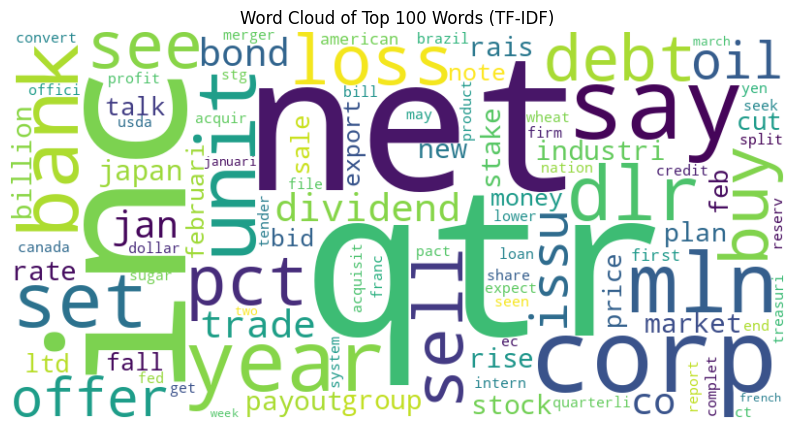

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Get feature names (top 100 words from TF-IDF)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Compute average TF-IDF score for each word
word_tfidf_scores = X_train_tfidf.mean(axis=0).A1  # Convert sparse matrix to array

# Create a dictionary of words and their scores
word_freq = dict(zip(feature_names, word_tfidf_scores))

# Generate word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top 100 Words (TF-IDF)")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6369
Precision: 0.5276
Recall: 0.6369
F1-Score: 0.5701


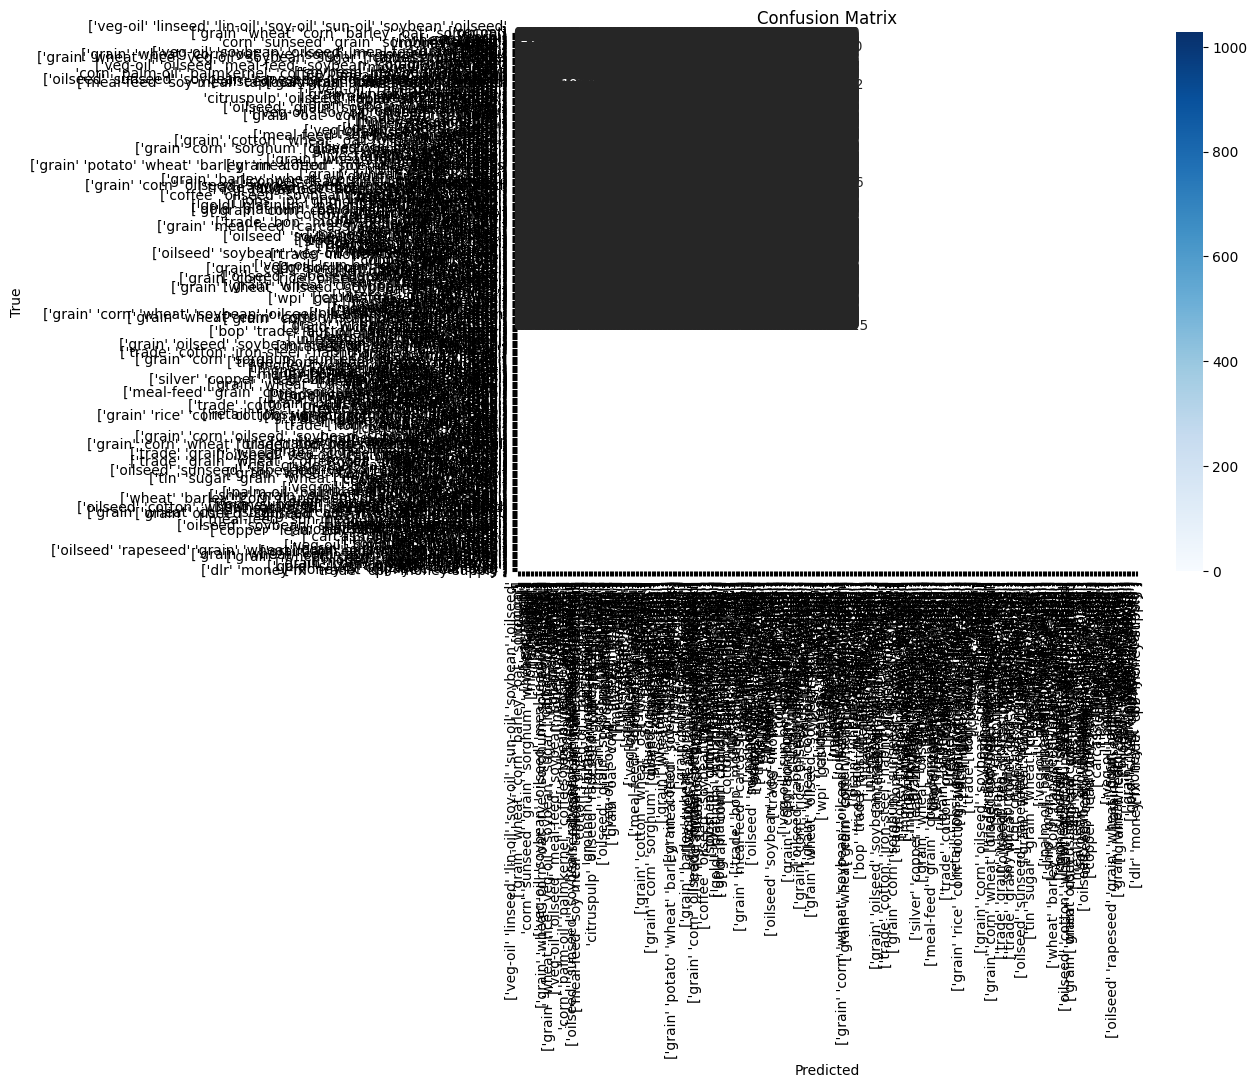

In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the labels
y_train = train_df['topics']
y_test = test_df['topics']

# Train a Naïve Bayes model using the CountVectorizer features (X_train_count)
nb_model = MultinomialNB()
nb_model.fit(X_train_count, y_train)

# Predict the labels for the test set
y_pred = nb_model.predict(X_test_count)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_df['topics'].unique(), yticklabels=train_df['topics'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Ensure that the labels are consistent with the unique values in y_test and y_pred
labels = train_df['topics'].unique()  # Use the unique labels from your train dataset

# Generate the classification report
report = classification_report(y_test, y_pred, labels=labels)
print(report)


                                                                                                                                                          precision    recall  f1-score   support

                                                                                                                                               ['cocoa']       0.00      0.00      0.00        15
                                                                                                       ['grain' 'wheat' 'corn' 'barley' 'oat' 'sorghum']       0.00      0.00      0.00         1
                                     ['veg-oil' 'linseed' 'lin-oil' 'soy-oil' 'sun-oil' 'soybean' 'oilseed'
 'corn' 'sunseed' 'grain' 'sorghum' 'wheat']       0.00      0.00      0.00         0
                                                                                                                                                      []       0.50      0.80      0.61       280
                             

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

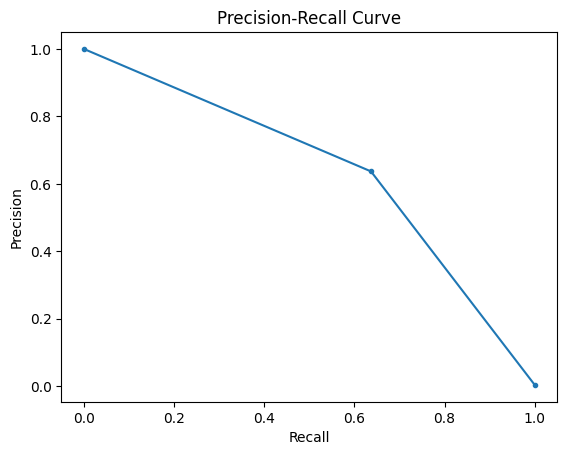

In [16]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Binarize the labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Compute precision-recall curve for each class
precision, recall, _ = precision_recall_curve(y_test_bin.ravel(), y_pred_bin.ravel())

# Plot Precision-Recall curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



**Discussion**

The dataset consists of titles of news articles. The dataset was already split into train and test. The objective of this Classification was to classify finance news.

We have used NLTK for stopwords, spaCy for tokenization, PorterStemmer for stemming and WordNetTokenizer for tokenization.

We have used Naive Bayes to train the model. Since there were around 750 unique words, the confusion matrix was unpleasant. Therefore we have used simple classification report and Precision VS Recall curve.

The metrics are as follows:

Accuracy: 0.6369

Precision: 0.5276

Recall: 0.6369

F1-Score: 0.5701

The Precision VS Recall curve shows that the model is neither very good (as it is not extending to the right), nor very poor (as it is not a straight diagonal), therfore the area under the curve is neither too poor nor too good.

Performance is affected because we have used the top 100 most appeared words only instead of all the words appearing in the dataset as you can see in the word cloud.

**Submission Guidelines:**

**Google Colab Notebook Submission:**

Save your notebook as NLP_Text_Classification_YourName.ipynb.

Ensure all code cells are executed, and the output is visible.

Include proper documentation and comments explaining each step.

**Report Submission (Optional):**

Prepare a short report (2-3 pages) summarizing your approach, findings, and model performance.

Upload the report along with the Colab Notebook.



**Grading Criteria:**

Correct implementation of NLP preprocessing (30%)

Effective use of vectorization techniques (20%)

Model accuracy and performance evaluation (30%)

Code clarity, documentation, and presentation (20%)

**Declaration**

I, Pranav Khatavkar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: Pranav Khatavkar

**Submission Checklist**

✔ Ultralitycs Platform Documentsation Like hel file for Given Task

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Evaluation Metrics Details and discussion